In [1]:
from branch_and_bound import solve_branch_and_bound

In [3]:
from time import time

def convergence(outbound, inbound, origins, timeout):
    times = []
    prices = []
    
    start = time()
    
    def solution_callback(solution):
        prices.append(solution.price)
        times.append(time() - start)
        
    def stop_callback():
        if time() - start > timeout:
            return True
        else:
            return False
    
    solve_branch_and_bound(outbound, inbound, origins, 
                           solution_callback=solution_callback, stop_callback=stop_callback)
    
    return times, prices

In [9]:
times, prices = convergence('anytime', 'anytime', ['MOW', 'LON'], 60)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

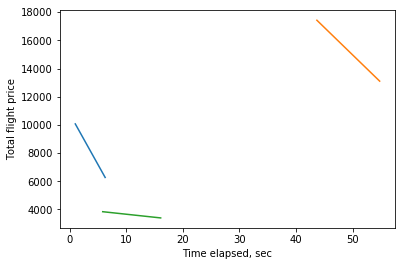

In [16]:
for outbound, inbound, origins, label in [('anytime', 'anytime', ['MOW', 'LON'], 'Moscow and London, anytime'), 
                                          ('anytime', 'anytime', ['BERL', 'RIGA', 'BUDA'], 'Berlin, Riga and Budapest, anytime'),
                                          ('2018-02', '2018-02', ['BRUS', 'LON'], 'Brussels and London, Febuary'),
                                          ('2018-02-01', '2018-02-03', ['BRUS', 'LON'], 'Brussels and London, Febuary 1-3')]:
    times, prices = convergence(outbound, inbound, origins, 60)
    
    plt.xlabel('Time elapsed, sec')
    plt.ylabel('Total flight price')
    plt.plot(times, prices, label=label)